### Нейронные сети
___
##### НПМмд-01-19
##### преподаватель : Аносова Наталья Павловна
##### Студент: Мухамаду Хади Диалло
____
#### Домашнее задание : week 1

##### 1)Для первой обучающей выборки построить и обучить сеть типа персептрон Розенблата, которая будет правильно относить точки к двум различным классам. Отобразить эти точки и дискриминантную линию до начла обучения (при начальном задании весов) и после обучения.
#####  2) Изменить обучающее множество так, чтобы множества стали линейно не разделимы.
#####  3) Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем заданным классам. Отобразить на графике как сами точки, обозначив к какому из классов они относятся, так и дискриминантные линии.

_____

##### 1)Для первой обучающей выборки построить и обучить сеть типа персептрон Розенблата, которая будет правильно относить точки к двум различным классам. Отобразить эти точки и дискриминантную линию до начла обучения (при начальном задании весов) и после обучения.

In [2]:
# module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# data from the file
X=np.array(([2.6, 3.6, 0.1, 0.8, -3.1, 2.4],
            [-3.4, 4.8, 3.8, -3.5, -1, 3.2]))

Y=np.array(([1, 1, 0, 0, 0, 1]))

In [8]:
data_X=pd.DataFrame(X)
data_Y=pd.DataFrame(Y)
X=data_X.T.loc[:]
Y=data_Y.loc[:]
X=X.values
Y=Y.values
print(X.shape)
print(Y.shape)

(6, 2)
(6, 1)


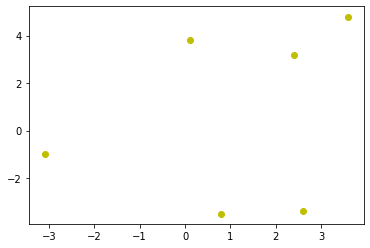

In [9]:
plt.scatter(X[:,0],X[:,1],c='y')

In [3]:
# step function
def stepfunction (t) :
    return 1 if (t>=0) else 0

In [21]:
# prediction 
def prediction(X,w,b) :
    return stepfunction((np.matmul(X,w)+b)[0])

# The perceptron
def perceptronStep(X,Y,w,b, alpha=0.1) :
    for i in range(len(X)): 
        y_pred=prediction(X[i],w,b)
        if (Y[i]-y_pred==1) :
            w[0]+=X[i][0]*alpha
            w[1]+=X[i][1]*alpha
            b+=alpha
        elif (Y[i]-y_pred==-1) :
            w[0]-=X[i][0]*alpha
            w[1]-=X[i][1]*alpha
            b-=alpha
    return w,b

# Training perceptron Algorithm

def trainPerceptronAlgo(X,Y,nb_iteration,alpha=0.1) :
    x_max=max(X.T[0])
    w=np.array(np.random.rand(2,1))
    b=np.random.rand(1)[0]+x_max
    boundary_lines=[]
    for i in range(nb_iteration) :
        w,b=perceptronStep(X,Y,w,b,alpha)
        boundary_lines.append(((-w[0]/w[1]),-b/w[1]))
    return boundary_lines

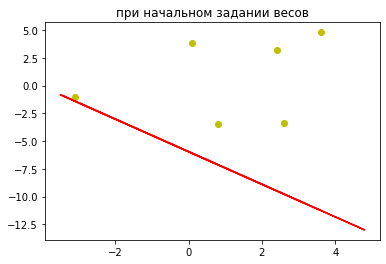

In [39]:
result1=trainPerceptronAlgo(X,Y,alpha=0.0,nb_iteration=1)

plt.scatter(X[:,0],X[:,1],c='y')
vals=result1[-1]
theta=result1[0][0]
intercept=vals[1][0]
y_pred=X*theta+intercept
plt.plot(X,y_pred,color="red")
plt.title("при начальном задании весов")
plt.show()


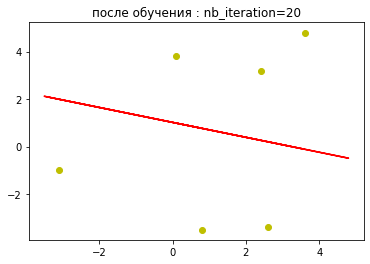

In [36]:
nb_iteration=100
result=trainPerceptronAlgo(X,Y,alpha=0.02,nb_iteration=100)
plt.scatter(X[:,0],X[:,1],c='y')
vals=result[-1]
theta=result[0][0]
intercept=vals[1][0]
y_pred=X*theta+intercept
plt.plot(X,y_pred,color="red")
plt.title("после обучения : nb_iteration=%d"%nb_iteration)
plt.show()

#####  2) Изменить обучающее множество так, чтобы множества стали линейно не разделимы.

In [56]:
X1=np.linspace(-2,2,6)
X2=X1*np.sqrt(X1**2+1)-2
X3=np.array((X1,X2))
X=pd.DataFrame(X3.T)
X=X.loc[:]
X=X.values
print(X.shape)

(6, 2)


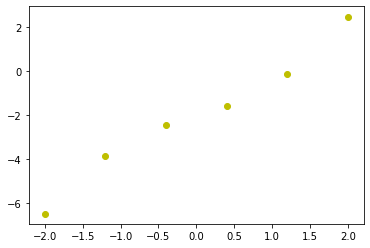

In [57]:
plt.scatter(X[:,0],X[:,1],c='y')

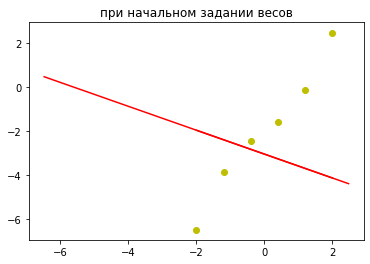

In [58]:
result1=trainPerceptronAlgo(X,Y,alpha=0.0,nb_iteration=1)

plt.scatter(X[:,0],X[:,1],c='y')
vals=result1[-1]
theta=result1[0][0]
intercept=vals[1][0]
y_pred=X*theta+intercept
plt.plot(X,y_pred,color="red")
plt.title("при начальном задании весов")
plt.show()

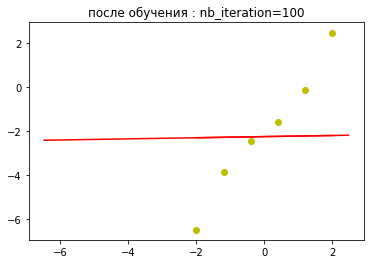

In [59]:
nb_iteration=100
result=trainPerceptronAlgo(X,Y,alpha=0.02,nb_iteration=100)
plt.scatter(X[:,0],X[:,1],c='y')
vals=result[-1]
theta=result[0][0]
intercept=vals[1][0]
y_pred=X*theta+intercept
plt.plot(X,y_pred,color="red")
plt.title("после обучения : nb_iteration=%d"%nb_iteration)
plt.show()

#####  3) Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем заданным классам. Отобразить на графике как сами точки, обозначив к какому из классов они относятся, так и дискриминантные линии.


In [63]:
# new data from the file
X=np.array(([-1.6 ,2.9 ,1.8 ,-4.5 ,-4.6 ,2.2 ,3.7 ,-4.3],
            [2.3 ,0.4 ,3.9 ,-2 ,-3.1 ,2.2 ,0.8,4.2]))

Y=np.array(([0,1,1,0,0,1,1,0],[0,1,0,1,1,1,1,0]))
data_X=pd.DataFrame(X)
data_Y=pd.DataFrame(Y)
X=data_X.T.loc[:]
Y=data_Y.T.loc[:]
X=X.values
Y=Y.values
print(X.shape)
print(Y.shape)

(8, 2)
(8, 2)


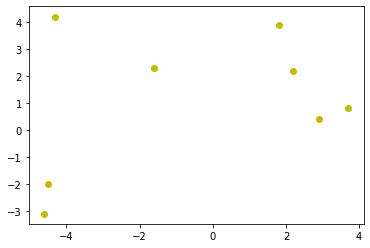

In [64]:
plt.scatter(X[:,0],X[:,1],c='y')

In [70]:
# prediction 
def prediction(X,w,b) :
    return stepfunction((np.matmul(X,w)+b)[0])

# The perceptron
def perceptronStep(X,Y,w,b, alpha=0.1) :
    for i in range(len(X)): 
        y_pred=prediction(X[i],w,b)
        if (Y[i][0]==Y[i][1]): 
            if (Y[i][0]-y_pred==1) :
                w[0]+=X[i][0]*alpha
                w[1]+=X[i][1]*alpha
                b+=alpha
            elif (Y[i][0]-y_pred==-1) :
                w[0]-=X[i][0]*alpha
                w[1]-=X[i][1]*alpha
                b-=alpha
        elif (Y[i][0]!=Y[i][1]) :
            if (Y[i][0]-y_pred==1) :
                w[0]+=X[i][0]*alpha
                w[1]+=X[i][1]*alpha
                b+=alpha
            elif (Y[i][0]-y_pred==-1) :
                w[0]-=X[i][0]*alpha
                w[1]-=X[i][1]*alpha
                b-=alpha
            elif (Y[i][1]-y_pred==1) :
                w[0]+=X[i][0]*alpha
                w[1]+=X[i][1]*alpha
                b+=alpha
            elif (Y[i][1]-y_pred==-1) :
                w[0]-=X[i][0]*alpha
                w[1]-=X[i][1]*alpha
                b-=alpha
    return w,b

# Training perceptron Algorithm

def trainPerceptronAlgo(X,Y,nb_iteration,alpha=0.02) :
    x_max=max(X.T[0])
    w=np.array(np.random.rand(2,1))
    b=np.random.rand(1)[0]+x_max
    boundary_lines=[]
    for i in range(nb_iteration) :
        w,b=perceptronStep(X,Y,w,b,alpha)
        boundary_lines.append(((-w[0]/w[1]),-b/w[1]))
    return boundary_lines

In [72]:
trainPerceptronAlgo(X,Y,alpha=0.02,nb_iteration=1)

[(array([-0.88331096]), array([-12.692858]))]

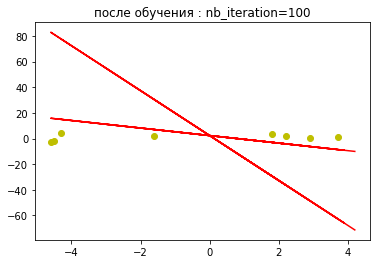

In [73]:
nb_iteration=100
result=trainPerceptronAlgo(X,Y,alpha=0.02,nb_iteration=100)
plt.scatter(X[:,0],X[:,1],c='y')
vals=result[-1]
theta=result[0][0]
theta2=result[0][1]
intercept=vals[1][0]
y_pred=X*theta+intercept
y_pred2=X*theta2+intercept
plt.plot(X,y_pred,color="red")
plt.plot(X,y_pred2,color="red")
plt.title("после обучения : nb_iteration=%d"%nb_iteration)
plt.show()